In [ ]:
#Task-12A:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from google.colab import drive 
import pandas as pd

drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/gender_dataset.csv' , sep = ";")
y = df['sex']
x = df.drop(columns=['sex'])



from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

test_df = pd.read_csv('gdrive/My Drive/gender_test_dataset.csv' , sep = ",")
x_new = test_df.drop(columns=['sex'])
y_predicted = model.predict(x_new)

print(y_predicted)

yprob = model.predict_proba(x_new)
yprob[-8:].round(2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['female' 'female' 'male' 'female' 'female' 'male']


array([[0.99, 0.01],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.81, 0.19],
       [0.82, 0.18],
       [0.04, 0.96]])

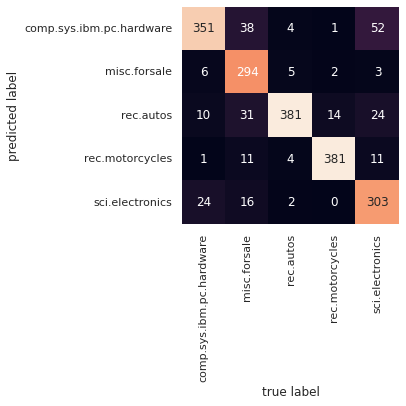

In [ ]:
#Task-12B:

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

categories = ['sci.electronics', 'misc.forsale', 'rec.autos',
              'rec.motorcycles', 'comp.sys.ibm.pc.hardware']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test.target, labels)

0.8684611477907568

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('buying ford mustang')

'rec.autos'

In [ ]:
predict_category('buying honda cbr125')

'rec.motorcycles'

In [ ]:
predict_category('nvidia new graphic cards')

'comp.sys.ibm.pc.hardware'

In [ ]:
predict_category('How to fix lamp')

'sci.electronics'

In [ ]:
predict_category('Rent a cheap house in texas')

'misc.forsale'

In [ ]:
#Task-12C
xfit = np.linspace(0, 10, 1000)
rng = np.random.RandomState(1)
x = 10 * rng.rand(30)
y = np.sin(x) + 0.05 * rng.randn(30)

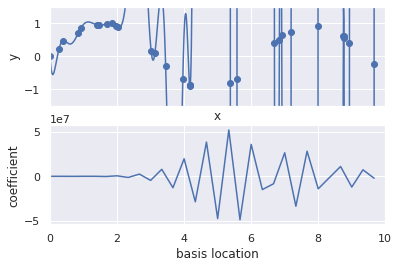

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

class GaussianFeatures(BaseEstimator, TransformerMixin): 
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

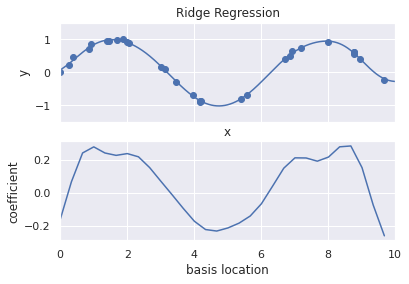

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

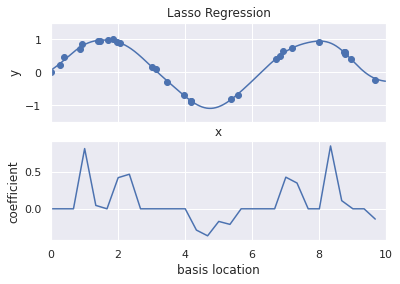

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

In [ ]:
#Task-12D
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -o BicycleWeather.csv https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv

In [ ]:
import pandas as pd
import numpy as np
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

daily['annual'] = (daily.index - daily.index[0]).days / 365.

from sklearn.linear_model import LinearRegression
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

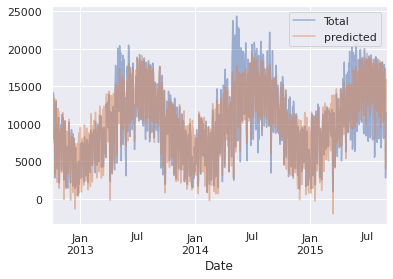

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

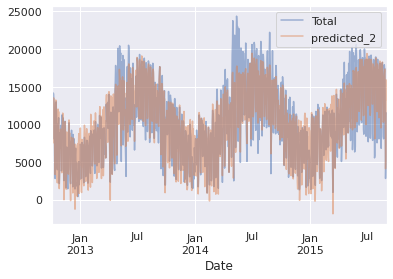

In [ ]:
model_2 = Ridge()
model_2.fit(X, y)
daily['predicted_2'] = model_2.predict(X)

daily[['Total', 'predicted_2']].plot(alpha=0.5);

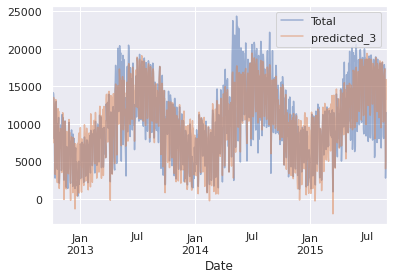

In [ ]:
model_3 = Lasso()
model_3.fit(X, y)
daily['predicted_3'] = model_3.predict(X)

daily[['Total', 'predicted_3']].plot(alpha=0.5);

In [ ]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted,predicted_2,predicted_3
Date,,,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0,0.000000,13853.601102,13826.698620,13845.304020
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0,0.002740,13447.791325,13419.183760,13444.326781
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0,0.005479,12643.735292,12627.377924,12649.477116
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0,0.008219,7632.376697,7652.309442,7638.771775
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0,0.010959,7481.794465,7502.298729,7488.072952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,10612.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0.0,2.901370,12957.943576,12956.129504,12963.690930
2015-08-29,2796.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0.0,2.904110,4010.596179,4087.423711,4034.009062
2015-08-30,4852.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0.0,2.906849,5843.552426,5891.115347,5854.645300
